
# Explore Exercises

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
# Planning:
# Can we determine what type of Iris is being examined based on 
# metrics taken from a study of three different species of the flower?
# Do we have significant indicators of what type of species we encounter based on petal or sepal lengths?

In [3]:
# Acquisition:

# connection function for accessing mysql
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# query to acquire the iris data
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

# function to get the data and run the query
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

In [4]:
# acquire the data
df = get_data()

In [5]:
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [6]:
# Preparation: 
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [7]:
df = prep_iris_inline(df)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Split your data into train, validate, and test samples.

In [10]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [11]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

#### Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using `.describe()`).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [13]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [14]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


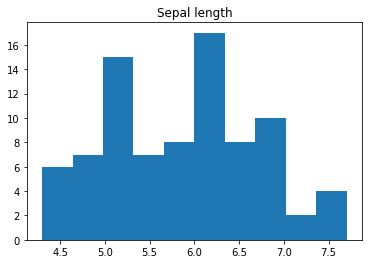

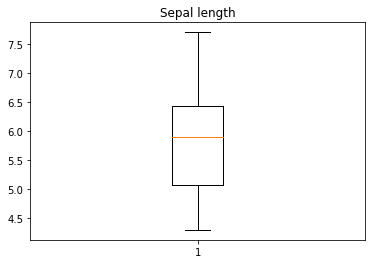

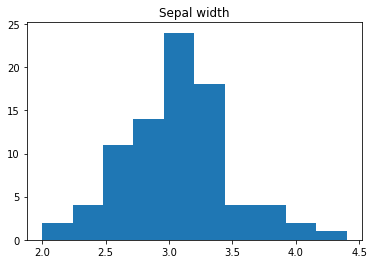

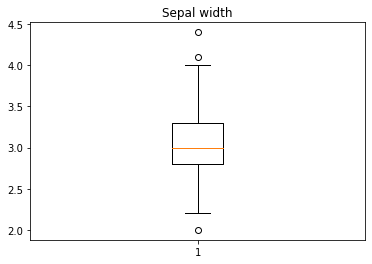

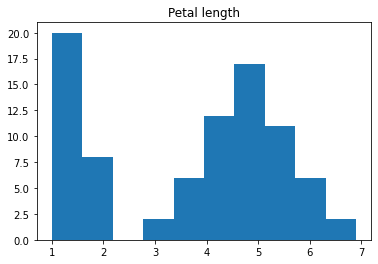

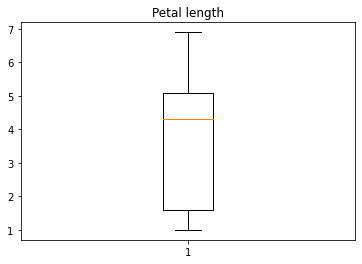

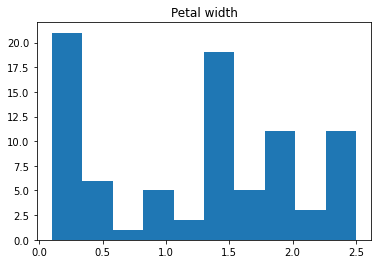

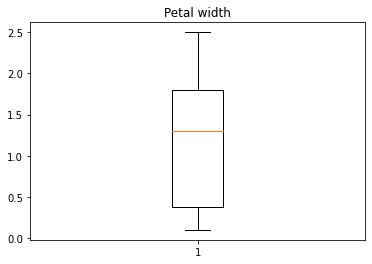

In [18]:
# Plot numeric columns
# define num_cols here:
# num_cols could be defined by datatype of float64, or just anything that isn't an object
# every thing in train.columns where the train[col] series is not an object
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

### Initial takeaways:
#### We observe some significant indication of a bimodal distribution on the feature of Petal length, which seems to point toward the idea that at least one species of Iris has a significantly shorter petal length than the others =====> If we phrased this in continued investigation, we would utilize a means to see if the subset of one species petal length is significantly different/smaller than the other, depending on the tailed-ness of the test we choose to perform.

#### Additionally, we see potentially interesting spikes in the petal width of the data set, which might point towards associations between groups on our training data in association with our target

#### Sepal Width looked exceptionally normal for a small(er) data set

In [20]:
# Do the same process for our target, a categorical dependent variable
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

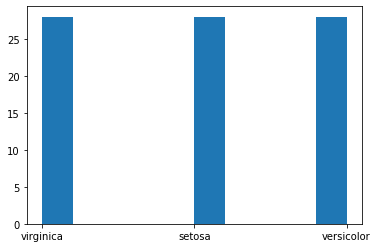

In [21]:
plt.hist(train.species)
plt.show()

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

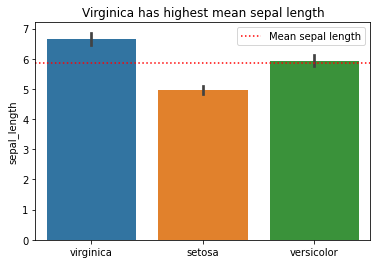

In [24]:
# we retroactively place our takeaway from this visualization as the title
plt.title("Virginica has highest mean sepal length")
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# calculating a mean of the sepal length (for *all* the species)
mean_sepal_length = train.sepal_length.mean()
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

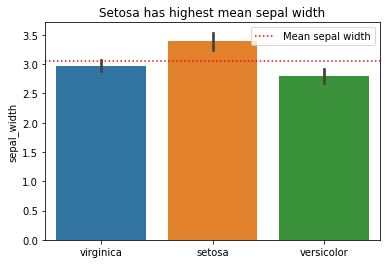

In [28]:
# change sepal length to sepal width, run same process
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

 - It looks like Setosas have a shorter/fatter sepal compared to the other two species, it may provide extra value toward our target if we combine these features into area(?) Will investigate further

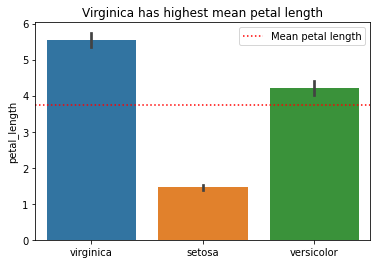

In [29]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

 - Setosa has a significantly smaller petal length than either of the other two species

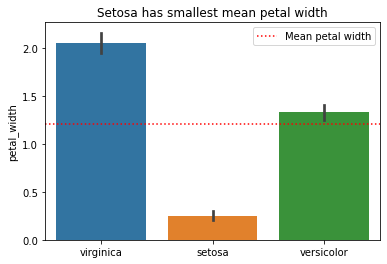

In [30]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [31]:
# Virginica descriptive statistics
# train, where train.species is virginica
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [32]:
# Setosa descriptive statistics
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [33]:
# Versicolor descriptive statistics
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [ ]:
# alpha: 0.05

### H0: Virginica petals on average are lower or the same as Versicolor petals
### Ha: Virginica petals on average are significantly larger than Versicolor petals

In [36]:


# establish variables that represent the species subset of train
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
# again, for versicolor
versicolor = train[train.species == 'versicolor']\
# again, for setosa
setosa = train[train.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [ ]:
# We have a significantly lower p value than 0.05, we can reject the null hypotehsis

In [35]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840642e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




**Takeaways** 
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features? 
- viginica iris have the largest petals. 
- setosa iris have the smallest petals. 
- setosa seem to have wide & short sepals. 

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col


Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [37]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [38]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
138,6.0,3.0,4.8,1.8,virginica,18.00,8.64
7,5.0,3.4,1.5,0.2,setosa,17.00,0.30
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
74,6.4,2.9,4.3,1.3,versicolor,18.56,5.59
97,6.2,2.9,4.3,1.3,versicolor,17.98,5.59


In [40]:
import itertools

In [42]:
list(itertools.combinations(train.drop(columns='species').columns, 2))

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_length', 'sepal_area'),
 ('sepal_length', 'petal_area'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'sepal_area'),
 ('sepal_width', 'petal_area'),
 ('petal_length', 'petal_width'),
 ('petal_length', 'sepal_area'),
 ('petal_length', 'petal_area'),
 ('petal_width', 'sepal_area'),
 ('petal_width', 'petal_area'),
 ('sepal_area', 'petal_area')]

In [43]:
# define feature combinations with a list of tuples
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [49]:
combos[0]

('sepal_length', 'sepal_width')

In [46]:
# we can use aggretations to examine specific stats on our categorical target
train.groupby('species')['sepal_area'].sum()

species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [54]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

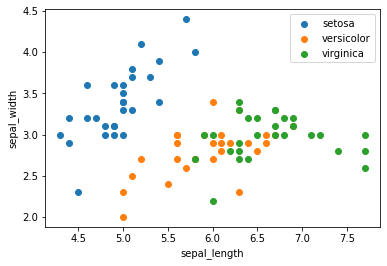

In [55]:
# test it with one plot
scatter_species(x,y)

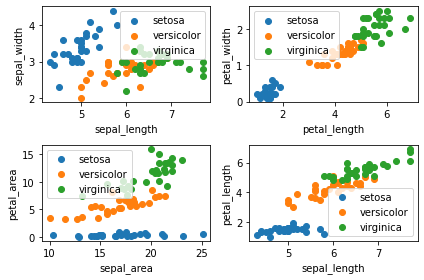

In [56]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

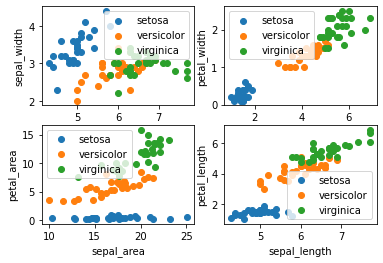

In [57]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

**Takeaways**

- sepal_length is useful, sepal_width not great but likely adds some value. 
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length. 
- sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton. 

A heatmap of each variable layering correlation coefficient on top.

*n.b. Please do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.*

In [58]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.166612,0.900357,0.860775,0.685879,0.885277
sepal_width,-0.166612,1.000000,-0.415310,-0.323396,0.599240,-0.272634
petal_length,0.900357,-0.415310,1.000000,0.965383,0.429428,0.958520
petal_width,0.860775,-0.323396,0.965383,1.000000,0.473277,0.980366
sepal_area,0.685879,0.599240,0.429428,0.473277,1.000000,0.526012
petal_area,0.885277,-0.272634,0.958520,0.980366,0.526012,1.000000


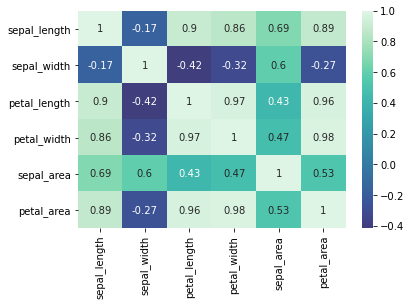

In [59]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

**Takeaways**

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width. 

A scatter matrix visualizing the interaction of each variable.

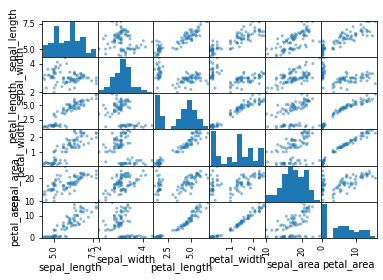

In [60]:
pd.plotting.scatter_matrix(train)
plt.show()

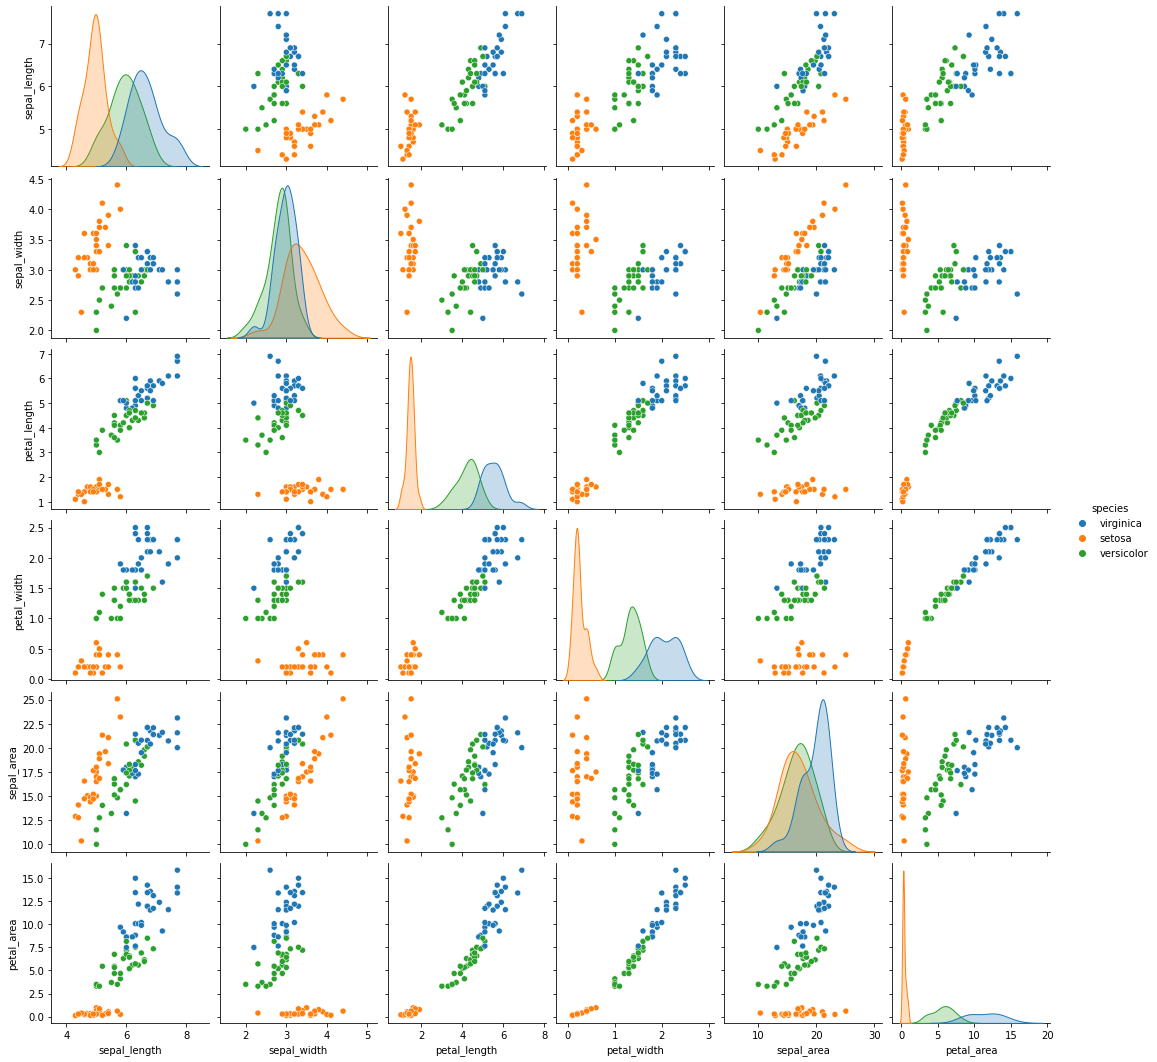

In [61]:
sns.pairplot(train, hue='species')
plt.show()

In [ ]:
train.info()

**Takeaways** 

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine. 
- petal area seems to show the largest separation between virginica & versicolor of all the individual features. 
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say. 
- virginica and versicolor show little to no difference when it comes to the width of the sepals. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [62]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

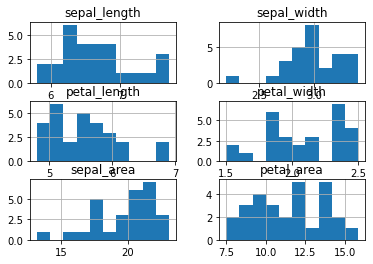

In [63]:
virginica.hist()
plt.show()

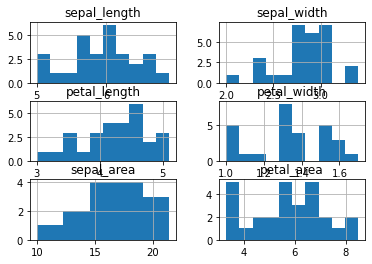

In [64]:
versicolor.hist()
plt.show()

In [65]:
virginica.describe()['sepal_length']['std']

0.532985998009398

In [66]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.935714
std       0.512231
min       5.000000
25%       5.600000
50%       6.000000
75%       6.300000
max       6.900000
Name: sepal_length, dtype: float64

In [67]:
import scipy.stats as stats

In [68]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [69]:
tstat

5.11297615624047

In [70]:
p

4.304267066877367e-06

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [71]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=250.0, pvalue=0.009508012794926874)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

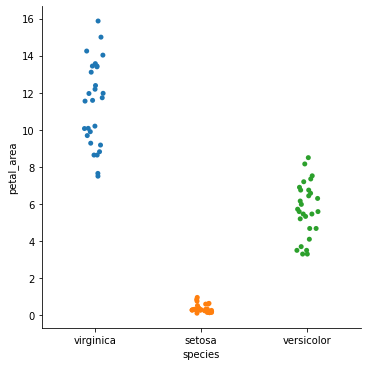

In [72]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

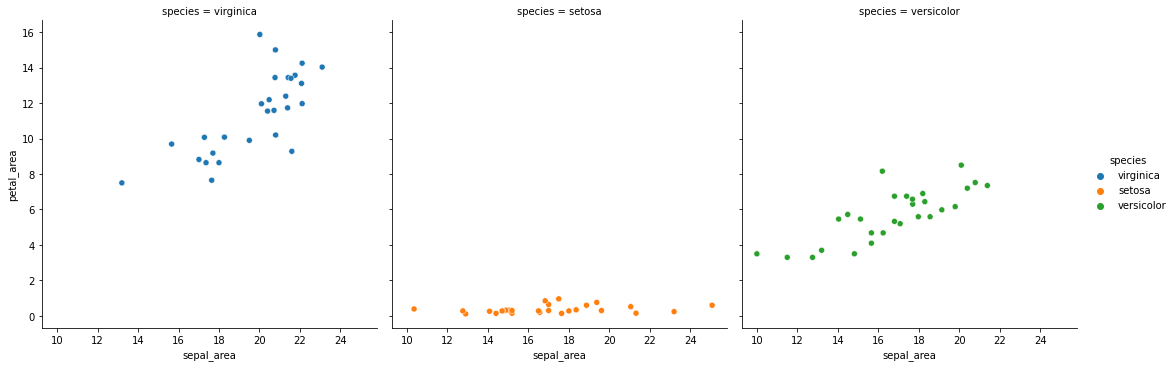

In [73]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')